# Case Técnico BIX: Consultoria de dados para uma empresa de transportes de caminhão.

## Planejamento da Solução

### Entrada



#### Entendimento de Negócio

**Qual é o problema de negócio?**

* Uma empresa terceirizada de transporte de caminhões deseja diminuir os gastos de manutenção dos sistemas de ar de sua frota de veículos. Visto que foi observado que esse valor vem crescendo ao longo dos últimos anos mesmo mantendo o tamanho de sua frota constante. Para resolver esse problema, podemos fazer a seguinte análise:

    1. Realizar a classificação dos caminhões baseado em suas características representadas pela tabela fornecida pelo setor de manutenção de modo a identificar quais desses caminhões possuem defeitos no sistema de ar e assim poder prevenir gastos adicionais.
    2. Dataset dos dados de caminhões


### Saída

* Qual o formato de entrega da solução ? O que o time de negócio irá ver como saída.

    - Documento no formado docx ou pdf, direcionado ao time de negócio com informações pertinentes ao processo de desenvolvimento do modelo que classifica se um caminhão tem um problema em seu sistema de ar.
    - Relatório com os valores da diminuição de gastos gerada pela implementação desse modelo de classificação e apresentação dos principais fatores que podem explicar o comportamento de falha no sistema de ar nos caminhões.
    - Documento em formato pdf com as respostas referentes as perguntas do desafio.




### Metodologia
- CRISP-DM, metodologia ágil para desenvolvimento de projetos de ciência de dados ( método cíclico ).
- Abordagem de classificação.

### Ferramentas Utilizadas
Python 3.10.6, Jupyter-Lab, Git, Github

## Implementações Realizadas na Sprint

### Ciclo 1

* Entendimento do Problema de Negócio e Planejamento da Solução.
* Importações de Bibliotecas e Funções Auxiliares.
* Leitura dos Dados.
* Descrição breve dos dados.
* Análise da distribuição da classe de dados.
* Preparação dos Dados para Modelagem.
* Aplicação de um modelo baseline de ML e estudo de algumas métricas.
* Resultados de negócio gerado pelo modelo baseline

# 0.0 Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML
from sklearn import model_selection as ms

from sklearn.metrics import accuracy_score



from sklearn.neighbors       import KNeighborsClassifier
from sklearn.naive_bayes     import GaussianNB
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from numpy import set_printoptions
set_printoptions(suppress = True)


# from xgboost                 import XGBClassifier 

# 0.1 Auxiliar Functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    display(HTML ('<style>.container {width:100% !important;} </style>') )
    pd.options.display.max_columns=None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr',False)
    pd.set_option('display.float_format', lambda x: '%.4f' % x)
    
    sns.set()
    
jupyter_settings()


# 0.2 Loading Data

In [4]:
# Analysing Data
df_raw_prev = pd.read_csv('../data/air_system_previous_years.csv')
df_raw_present =  pd.read_csv('../data/air_system_present_year.csv')

In [5]:
df_raw_prev.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

In [6]:
df_raw_present.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,na,na,na,na,na,na,na,na,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,1209600,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,0,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,na,na,na,na,na,na,na,na,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,1209600,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,0,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,245240,na,na,na,na,na,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,1209600,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,0,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,904,1426,223226,2663348,1137664,104,0,0,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,98,238,880,16,1772828,51468,331744,316130,176000,208420,159380,na,na,na,na,na,100120,59816.46,4201350,4201350,4203050,29967.0,26214,51894,562680,4030198,1209600,114684,0,144,0,3387773.76,38633.28,599624.64,0,0,0,0,14308,475410,1109740,1528024,837114,58942,6220,440,1278,1292,4201350,na,6846,810,70090,345884,191284,2454600,926846,33558,280,0,1516,1398,2050280,64066,0,674,0,46,3413978,2924,414,0,0,60,387

# 1.0 Data Description

In [7]:
df1 = df_raw_prev.copy()
df1_test = df_raw_present.copy()

## 1.1 Data Columns

In [8]:
df1.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [9]:
df1_test.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

## 1.2 Data Dimension 


In [10]:
print('Formato do dataset de treino: {} linhas e {} colunas'.format(df1.shape[0], df1.shape[1]))

Formato do dataset de treino: 60000 linhas e 171 colunas


## 1.3 Data Types

In [12]:
df1.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
ae_000    object
af_000    object
ag_000    object
ag_001    object
ag_002    object
ag_003    object
ag_004    object
ag_005    object
ag_006    object
ag_007    object
ag_008    object
ag_009    object
ah_000    object
ai_000    object
aj_000    object
ak_000    object
al_000    object
am_0      object
an_000    object
ao_000    object
ap_000    object
aq_000    object
ar_000    object
as_000    object
at_000    object
au_000    object
av_000    object
ax_000    object
ay_000    object
ay_001    object
ay_002    object
ay_003    object
ay_004    object
ay_005    object
ay_006    object
ay_007    object
ay_008    object
ay_009    object
az_000    object
az_001    object
az_002    object
az_003    object
az_004    object
az_005    object
az_006    object
az_007    object
az_008    object
az_009    object
ba_000    object
ba_001    object
ba_002    object
ba_003    object
ba_004    object
ba_005    obje

Nessa etapa podemos observar que praticamente todas variáveis estão como tipo de objeto (menos a 1º) , portanto precisamos transformas elas em um tipo númerico visto que só possuímos numeros como valores.

## 1.4 Check NA / Check Duplicated Rows

In [13]:
df1 = df1.replace('na',np.nan)
df1_test = df1_test.replace('na',np.nan)

In [14]:
# Transform object features as float
df1 = df1.astype({col: float for col in df1.columns[1:]})
df1_test = df1_test.astype({col: float for col in df1_test.columns[1:]})

In [15]:
df1.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0000,NaN,2130706438.0000,280.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37250.0000,1432864.0000,3664156.0000,1007684.0000,25896.0000,0.0000,2551696.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4933296.0000,3655166.0000,1766008.0000,1132040.0000,0.0000,0.0000,0.0000,0.0000,1012.0000,268.0000,0.0000,0.0000,0.0000,0.0000,0.0000,469014.0000,4239660.0000,703300.0000,755876.0000,0.0000,5374.0000,2108.0000,4114.0000,12348.0000,615248.0000,5526276.0000,2378.0000,4.0000,0.0000,0.0000,2328746.0000,1022304.0000,415432.0000,287230.0000,310246.0000,681504.0000,1118814.0000,3574.0000,0.0000,0.0000,6700214.0000,0.0000,10.0000,108.0000,50.0000,2551696.0000,97518.0000,947550.0000,799478.0000,330760.0000,353400.0000,299160.0000,305200.0000,283680.0000,NaN,NaN,NaN,178540.0000,76698.0800,6700214.0000,6700214.0000,6599892.0000,43566.0000,68656.0000,54064.0000,638360.0000,6167850.0000,1209600.0000,246244.0000,2.0000,96.0000,0.0000,5245752.0000,0.0000,916567.6800,6.0000,1924.0000,0.0000,0.0000,0.0000,118196.0000,1309472.0000,3247182.0000,1381362.0000,98822.0000,11208.0000,1608.0000,220.0000,240.0000,6700214.0000,NaN,10476.0000,1226.0000,267998.0000,521832.0000,428776.0000,4015854.0000,895240.0000,26330.0000,118.0000,0.0000,532.0000,734.0000,4122704.0000,51288.0000,0.0000,532572.0000,0.0000,18.0000,5330690.0000,4732.0000,1126.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,62282.0000,85908.0000,32790.0000,0.0000,0.0000,202710.0000,37928.0000,14745580.0000,1876644.0000,0.0000,0.0000,0.0000,0.0000,2801180.0000,2445.8000,2712.0000,965866.0000,1706908.0000,1240520.0000,493384.0000,721044.0000,469792.0000,339156.0000,157956.0000,73224.0000,0.0000,0.0000,0.0000
1,neg,33058.0000,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,18254.0000,653294.0000,1720800.0000,516724.0000,31642.0000,0.0000,1393352.0000,0.0000,68.0000,0.0000,0.0000,0.0000,2560898.0000,2127150.0000,1084598.0000,338544.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,71510.0000,772720.0000,1996924.0000,99560.0000,0.0000,7336.0000,7808.0000,13776.0000,13086.0000,1010074.0000,1873902.0000,14726.0000,6.0000,0.0000,0.0000,1378576.0000,447166.0000,199512.0000,154298.0000,137280.0000,138668.0000,165908.0000,229652.0000,87082.0000,4708.0000,3646660.0000,86.0000,454.0000,364.0000,350.0000,1393352.0000,49028.0000,688314.0000,392208.0000,341420.0000,359780.0000,366560.0000,NaN,NaN,NaN,NaN,NaN,6700.0000,33057.5100,3646660.0000,3646660.0000,3582034.0000,17733.0000,260120.0000,115626.0000,6900.0000,2942850.0000,1209600.0000,0.0000,NaN,NaN,NaN,2291079.3600,0.0000,643536.9600,0.0000,0.0000,0.0000,0.0000,38.0000,98644.0000,1179502.0000,1286736.0000,336388.0000,36294.0000,5192.0000,56.0000,NaN,0.0000,3646660.0000,NaN,6160.0000,796.0000,164860.0000,350066.0000,272956.0000,18

In [16]:
df1.isna().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
ag_000      671
ag_001      671
ag_002      671
ag_003      671
ag_004      671
ag_005      671
ag_006      671
ag_007      671
ag_008      671
ag_009      671
ah_000      645
ai_000      629
aj_000      629
ak_000     4400
al_000      642
am_0        629
an_000      642
ao_000      589
ap_000      642
aq_000      589
ar_000     2723
as_000      629
at_000      629
au_000      629
av_000     2500
ax_000     2501
ay_000      671
ay_001      671
ay_002      671
ay_003      671
ay_004      671
ay_005      671
ay_006      671
ay_007      671
ay_008      671
ay_009      671
az_000      671
az_001      671
az_002      671
az_003      671
az_004      671
az_005      671
az_006      671
az_007      671
az_008      671
az_009      671
ba_000      688
ba_001      688
ba_002      688
ba_003      688
ba_004      688
ba_005      688
ba_006      688
ba_007      688
ba_008      688
ba_009  

In [17]:
df1_test.isna().sum()

class         0
aa_000        0
ab_000    12363
ac_000      926
ad_000     3981
ae_000      690
af_000      690
ag_000      189
ag_001      189
ag_002      189
ag_003      189
ag_004      189
ag_005      189
ag_006      189
ag_007      189
ag_008      189
ag_009      189
ah_000      175
ai_000      163
aj_000      163
ak_000     1198
al_000      169
am_0        163
an_000      169
ao_000      162
ap_000      169
aq_000      162
ar_000      764
as_000      163
at_000      163
au_000      163
av_000      688
ax_000      688
ay_000      192
ay_001      192
ay_002      192
ay_003      192
ay_004      192
ay_005      192
ay_006      192
ay_007      192
ay_008      192
ay_009      192
az_000      192
az_001      192
az_002      192
az_003      192
az_004      192
az_005      192
az_006      192
az_007      192
az_008      192
az_009      192
ba_000      193
ba_001      193
ba_002      193
ba_003      193
ba_004      193
ba_005      193
ba_006      193
ba_007      193
ba_008      193
ba_009  

In [18]:
# CHECK DUPLICATED ROWS ON TRAIN
duplicated_train = df1[df1.duplicated()]
duplicated_train


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000


In [19]:
# CHECK DUPLICATED ROWS ON TEST
duplicated_test = df1_test[df1_test.duplicated()]
duplicated_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000


## 1.5 Checking Duplicated Features and columns with 1 val 

In [20]:
#Check duplicated rows in train
feature_duplicated_train = df1.T.drop_duplicates().T

#Check duplicated columns in test
feature_duplicated_teste = df1_test.T.drop_duplicates().T

In [21]:
df1.shape

(60000, 171)

In [22]:
feature_duplicated_train.shape

(60000, 171)

In [23]:
df1_test.shape

(16000, 171)

In [24]:
feature_duplicated_teste.shape

(16000, 171)

Como podemos observar nenhuma coluna foi dropada, portanto não possuímos colunas duplicadas.

In [25]:
# Checking Feature with only one value () -> Não acrescenta conhecimento nenhum ao modelo.
cols_one_value_train = df1.columns[df1.nunique() == 1]
cols_one_value_train 

Index(['cd_000'], dtype='object')

In [26]:
df1['cd_000'].value_counts()

1209600.0000    59324
Name: cd_000, dtype: int64

In [27]:
df1 = df1.drop(columns=['cd_000'],axis=1)

Aqui temos que tomar uma decisão, levando em consideração que não temos variabilidade nessa feature ( ou é 12096000 ou é NA) iremos dropa-la do dataset

In [28]:
# Checking Feature with only one value () -> Não acrescenta conhecimento nenhum ao modelo.
cols_one_value_test = df1_test.columns[df1_test.nunique() == 1]
cols_one_value_test

Index(['cd_000'], dtype='object')

In [29]:
df1_test = df1_test.drop(columns=['cd_000'],axis=1)

## 1.6 Replace / Fill NA

Como não temos maiores informações sobre as features devido a sua anonimidade, optaremos então por substituir todos os valores NA por **0** para não perdemos muitos dados ( outra opcao seria dropar os na's).

In [30]:
df1 = df1.replace(np.nan,0)
df1_test = df1_test.replace(np.nan,0)

## 1.7 Descriptive Statistics

In [31]:
num_attributes = df1.select_dtypes(include=['float64'])

In [32]:
num_attributes.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0000,0.0000,2130706438.0000,280.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37250.0000,1432864.0000,3664156.0000,1007684.0000,25896.0000,0.0000,2551696.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4933296.0000,3655166.0000,1766008.0000,1132040.0000,0.0000,0.0000,0.0000,0.0000,1012.0000,268.0000,0.0000,0.0000,0.0000,0.0000,0.0000,469014.0000,4239660.0000,703300.0000,755876.0000,0.0000,5374.0000,2108.0000,4114.0000,12348.0000,615248.0000,5526276.0000,2378.0000,4.0000,0.0000,0.0000,2328746.0000,1022304.0000,415432.0000,287230.0000,310246.0000,681504.0000,1118814.0000,3574.0000,0.0000,0.0000,6700214.0000,0.0000,10.0000,108.0000,50.0000,2551696.0000,97518.0000,947550.0000,799478.0000,330760.0000,353400.0000,299160.0000,305200.0000,283680.0000,0.0000,0.0000,0.0000,178540.0000,76698.0800,6700214.0000,6700214.0000,6599892.0000,43566.0000,68656.0000,54064.0000,638360.0000,6167850.0000,246244.0000,2.0000,96.0000,0.0000,5245752.0000,0.0000,916567.6800,6.0000,1924.0000,0.0000,0.0000,0.0000,118196.0000,1309472.0000,3247182.0000,1381362.0000,98822.0000,11208.0000,1608.0000,220.0000,240.0000,6700214.0000,0.0000,10476.0000,1226.0000,267998.0000,521832.0000,428776.0000,4015854.0000,895240.0000,26330.0000,118.0000,0.0000,532.0000,734.0000,4122704.0000,51288.0000,0.0000,532572.0000,0.0000,18.0000,5330690.0000,4732.0000,1126.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,62282.0000,85908.0000,32790.0000,0.0000,0.0000,202710.0000,37928.0000,14745580.0000,1876644.0000,0.0000,0.0000,0.0000,0.0000,2801180.0000,2445.8000,2712.0000,965866.0000,1706908.0000,1240520.0000,493384.0000,721044.0000,469792.0000,339156.0000,157956.0000,73224.0000,0.0000,0.0000,0.0000
1,33058.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,18254.0000,653294.0000,1720800.0000,516724.0000,31642.0000,0.0000,1393352.0000,0.0000,68.0000,0.0000,0.0000,0.0000,2560898.0000,2127150.0000,1084598.0000,338544.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,71510.0000,772720.0000,1996924.0000,99560.0000,0.0000,7336.0000,7808.0000,13776.0000,13086.0000,1010074.0000,1873902.0000,14726.0000,6.0000,0.0000,0.0000,1378576.0000,447166.0000,199512.0000,154298.0000,137280.0000,138668.0000,165908.0000,229652.0000,87082.0000,4708.0000,3646660.0000,86.0000,454.0000,364.0000,350.0000,1393352.0000,49028.0000,688314.0000,392208.0000,341420.0000,359780.0000,366560.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6700.0000,33057.5100,3646660.0000,3646660.0000,3582034.0000,17733.0000,260120.0000,115626.0000,6900.0000,2942850.0000,0.0000,0.0000,0.0000,0.0000,2291079.3600,0.0000,643536.9600,0.0000,0.0000,0.0000,0.0000,38.0000,98644.0000,1179502.0000,1286736.0000,336388.0000,36294.0000,5192.0000,56.0000,0.0000,0.0000,3646660.0000,0.0000,6160.0000,796.0000,164860.0000,350066.0000,272956.000

In [33]:
# Central Tendency - Media, Mediana 
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion std, min, max, range,skew,kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

In [34]:
# Concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d5,d6]).T.reset_index()
m.columns=['attributes','min','max','range','mean','median','skew','kurtosis']

In [35]:
m.head()

,attributes,min,max,range,mean,median,skew,kurtosis
0,aa_000,0.0000,2746564.0000,2746564.0000,59336.4996,30776.0000,6.1158,48.2974
1,ab_000,0.0000,204.0000,204.0000,0.1625,0.0000,57.0362,5119.1661
2,ac_000,0.0000,2130706796.0000,2130706796.0000,336225803.5780,120.0000,1.8774,1.5247
3,ad_000,0.0000,8584297742.0000,8584297742.0000,143407.0840,42.0000,244.9490,59999.9992
4,ae_000,0.0000,21050.0000,21050.0000,6.5350,0.0000,92.5316,11228.4059


# 2.0 Feature Engineering

# 3.0 Variables Filtering

# 4.0 EDA

## 4.1 Univariate Analysis

### 4.1.1 Response Variable

In [74]:
df4['class'] = df4['class'].apply(lambda x: 1 if x == 'pos' else 0)

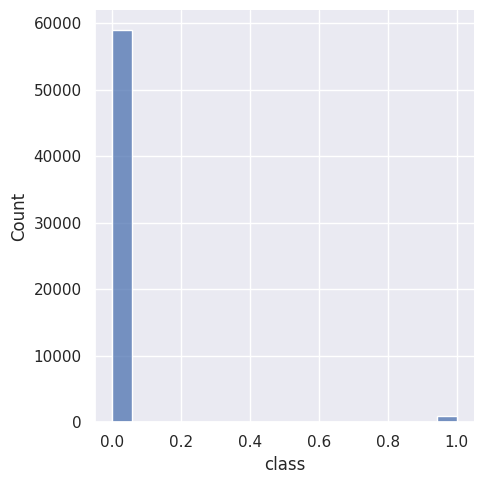

In [75]:
sns.displot(df4['class'],kde=False);

In [76]:
df4['class'].value_counts()

0    59000
1     1000
Name: class, dtype: int64

- 59000 caminhões com outros tipos de manutenção.
- 1000 caminhões com manutenção de sistema de ar.

--- > Muito desbalanceado, vamos deixar desse jeito por enquanto.

## 4.2 Other Variables

In [110]:
analyze = df4.describe()
df_T = analyze.T

media_baixa = df_T.loc[df_T['mean'] < 100]
lista_colunas = media_baixa.index


In [111]:
lista_colunas

Index(['class', 'ab_000', 'ae_000', 'af_000', 'ar_000', 'az_009', 'bf_000',
       'cg_000', 'ch_000', 'cr_000', 'da_000', 'db_000', 'dj_000', 'dz_000',
       'ea_000', 'ef_000', 'eg_000'],
      dtype='object')

In [112]:
df_aux1 = df4[lista_colunas]

In [113]:
df_aux1.head()

,class,ab_000,ae_000,af_000,ar_000,az_009,bf_000,cg_000,ch_000,cr_000,da_000,db_000,dj_000,dz_000,ea_000,ef_000,eg_000
0,0,0.0000,0.0000,0.0000,0.0000,0.0000,50.0000,96.0000,0.0000,0.0000,0.0000,18.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0,0.0000,0.0000,0.0000,0.0000,0.0000,350.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,124.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0,0.0000,0.0000,10.0000,0.0000,0.0000,0.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,32.0000
4,0,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,152.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


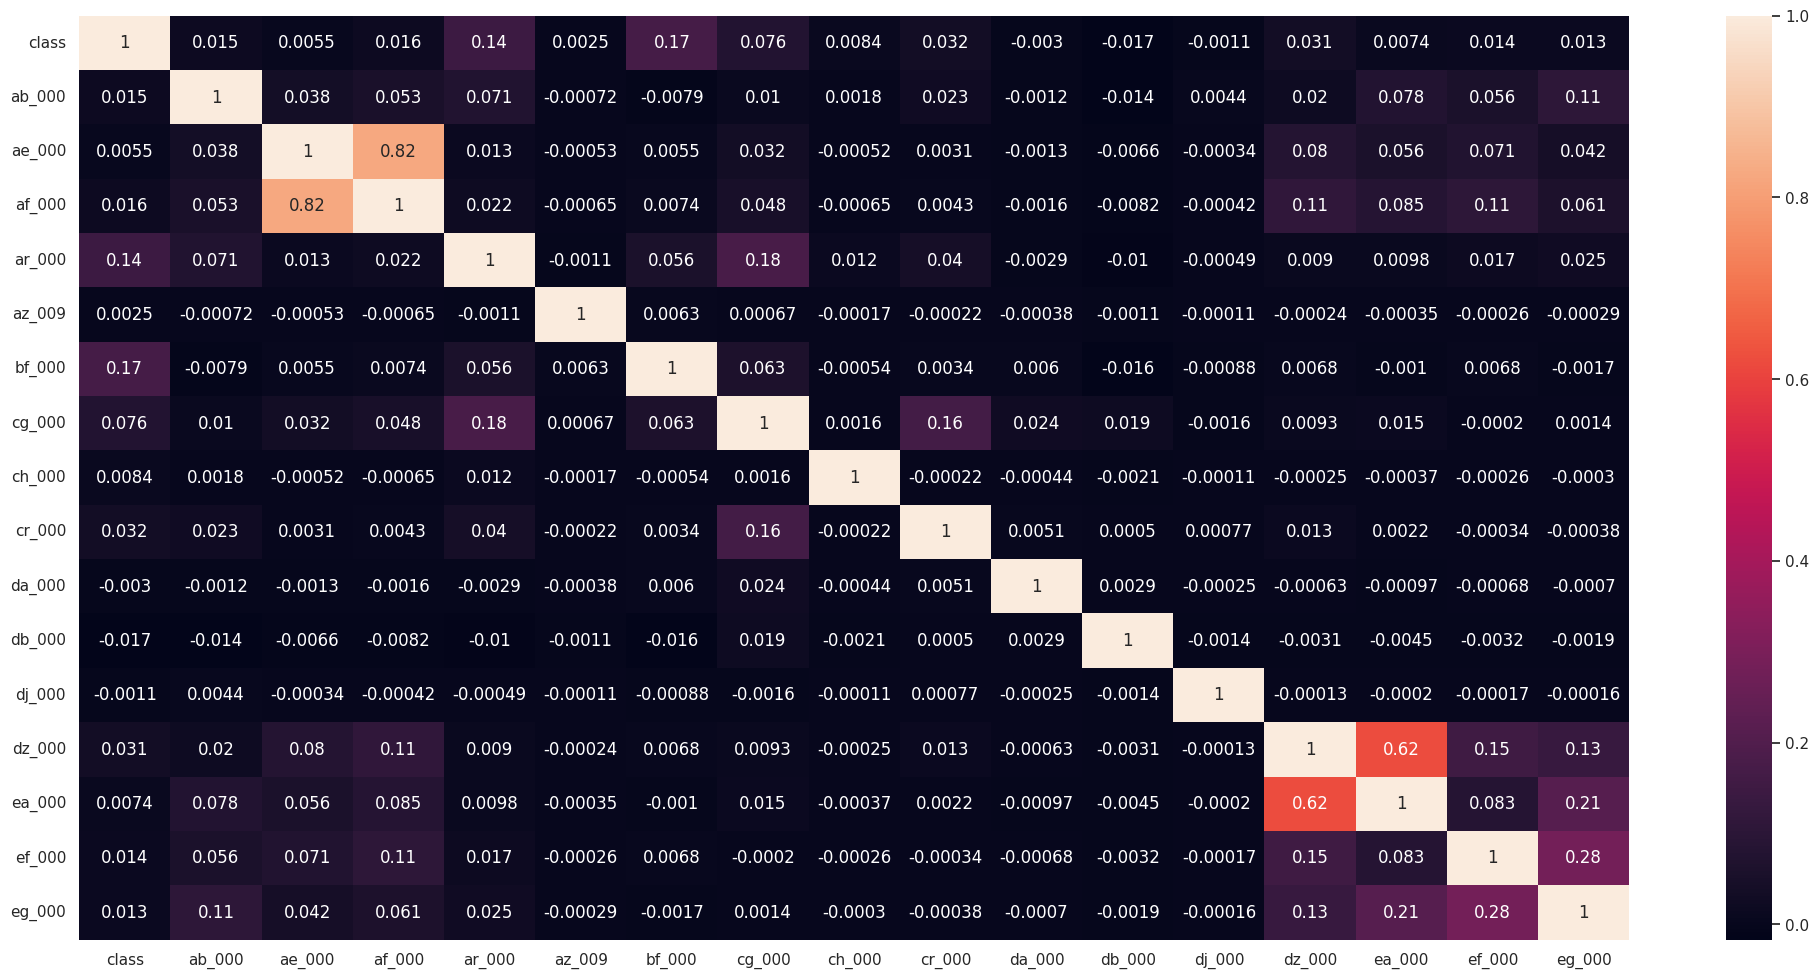

In [114]:
correlation = df_aux1.corr(method='pearson')
sns.heatmap(correlation,annot=True);

In [115]:
# # VARIAVEIS CORRELACIONADAS
# COM A VARIAVEL TARGET -> ar_000 | bf_000 

# # VARIAVEIS CORRELACIONAS ENTRE FEATURES
# AE_000 | AF_000 <----> DZ_000 E EA_000




In [116]:
# analyze = df4.describe()
# df_T = analyze.T

# media_baixa = df_T.loc[df_T['mean'] < 100]
# lista_colunas = media_baixa.index


In [117]:
# df4.head()

## 4.3. Correlation

In [43]:
# num_attributes.hist(bins=25);

In [46]:
num_attributes.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0000,0.0000,2130706438.0000,280.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37250.0000,1432864.0000,3664156.0000,1007684.0000,25896.0000,0.0000,2551696.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4933296.0000,3655166.0000,1766008.0000,1132040.0000,0.0000,0.0000,0.0000,0.0000,1012.0000,268.0000,0.0000,0.0000,0.0000,0.0000,0.0000,469014.0000,4239660.0000,703300.0000,755876.0000,0.0000,5374.0000,2108.0000,4114.0000,12348.0000,615248.0000,5526276.0000,2378.0000,4.0000,0.0000,0.0000,2328746.0000,1022304.0000,415432.0000,287230.0000,310246.0000,681504.0000,1118814.0000,3574.0000,0.0000,0.0000,6700214.0000,0.0000,10.0000,108.0000,50.0000,2551696.0000,97518.0000,947550.0000,799478.0000,330760.0000,353400.0000,299160.0000,305200.0000,283680.0000,0.0000,0.0000,0.0000,178540.0000,76698.0800,6700214.0000,6700214.0000,6599892.0000,43566.0000,68656.0000,54064.0000,638360.0000,6167850.0000,246244.0000,2.0000,96.0000,0.0000,5245752.0000,0.0000,916567.6800,6.0000,1924.0000,0.0000,0.0000,0.0000,118196.0000,1309472.0000,3247182.0000,1381362.0000,98822.0000,11208.0000,1608.0000,220.0000,240.0000,6700214.0000,0.0000,10476.0000,1226.0000,267998.0000,521832.0000,428776.0000,4015854.0000,895240.0000,26330.0000,118.0000,0.0000,532.0000,734.0000,4122704.0000,51288.0000,0.0000,532572.0000,0.0000,18.0000,5330690.0000,4732.0000,1126.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,62282.0000,85908.0000,32790.0000,0.0000,0.0000,202710.0000,37928.0000,14745580.0000,1876644.0000,0.0000,0.0000,0.0000,0.0000,2801180.0000,2445.8000,2712.0000,965866.0000,1706908.0000,1240520.0000,493384.0000,721044.0000,469792.0000,339156.0000,157956.0000,73224.0000,0.0000,0.0000,0.0000
1,33058.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,18254.0000,653294.0000,1720800.0000,516724.0000,31642.0000,0.0000,1393352.0000,0.0000,68.0000,0.0000,0.0000,0.0000,2560898.0000,2127150.0000,1084598.0000,338544.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,71510.0000,772720.0000,1996924.0000,99560.0000,0.0000,7336.0000,7808.0000,13776.0000,13086.0000,1010074.0000,1873902.0000,14726.0000,6.0000,0.0000,0.0000,1378576.0000,447166.0000,199512.0000,154298.0000,137280.0000,138668.0000,165908.0000,229652.0000,87082.0000,4708.0000,3646660.0000,86.0000,454.0000,364.0000,350.0000,1393352.0000,49028.0000,688314.0000,392208.0000,341420.0000,359780.0000,366560.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6700.0000,33057.5100,3646660.0000,3646660.0000,3582034.0000,17733.0000,260120.0000,115626.0000,6900.0000,2942850.0000,0.0000,0.0000,0.0000,0.0000,2291079.3600,0.0000,643536.9600,0.0000,0.0000,0.0000,0.0000,38.0000,98644.0000,1179502.0000,1286736.0000,336388.0000,36294.0000,5192.0000,56.0000,0.0000,0.0000,3646660.0000,0.0000,6160.0000,796.0000,164860.0000,350066.0000,272956.000

In [44]:
# correlation = num_attributes.corr(method='pearson')
# sns.heatmap(correlation,annot=True);

# 5.0 Data Preparation

In [ ]:
df5 = df4.copy()

In [ ]:
df5.head()

In [ ]:
X = df5.drop('class',axis=1)
y = df5['class'].copy()

In [ ]:
x_train, x_validation, y_train, y_validation = ms.train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
x_train.head()

# 6.0 Variable Selection

# 7.0 Machine Learning Model

## 7.1 Baseline Model

In [ ]:
# - O algoritmo de Machine Learning que será utilizado como modelo baseline será o KNN (K-Nearest Neighbors, ou K-vizinhos mais próximos). 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

yhat_knn = knn.predict(x_validation)



In [ ]:
## Accuracy
accuracy = accuracy_score(y_validation, yhat_knn)
print('Accuracy: {}'.format(accuracy))



In [ ]:
cm = confusion_matrix(y_validation, yhat_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)

In [ ]:
disp.plot()
plt.show()

Representação da Matriz de Confusão: 

| TN          FP  |   
| FN          TP  |


Custo para diferentes situações:

* True Negative(caminhao não possui problema no sistema de ar e modelo acertou): cobrado somente 10 dol pelos tempo gasto durante vistoria da equipe.
* True Positive(caminhao possui problema no sistema de ar e modelo acertou): 25 dol pela realização do serviço de reparo preventivo.
* False Negative(caminhao possui problema no sistema de ar e o modelo errou): 500 dol pela manutenção corretiva.
* False Positive(caminhao não possui problema no sistema de ar e o modelo errou): cobrado somente 10 dol pelo tempo gasto durante vistoria da equipe.

Portanto, podemos observar que a predição que mais prejudicaria o nosso custo seriam os **Falso Negativos**, no qual o modelo diria que o caminhão não teria problema no sistema de ar quando na verdade ele possui, gerando uma manutenção corretiva de 500 doláres por erro.


* Métricas de Classificação

    * Acurácia: Quantas Predicoes Corretas / Todas predicoes. PS: A acurácia é enviesada pela classe que mais temos exemplos de dados. Formula: (TP + TN) / Total


    * Precision:  Quantas Predições Corretas da Classe / Total Predições da classe.  PS: Utilizada quando trabalhamos com problemas em que um classe é muito mais importante que a outra. Ex: detecção de doenças.(TP / (TP+FP) )
  

    * Recall: Quantas Predicoes foram corretas Classe  / Todos de Exemplos REAIS de cada classe FR. PS: O aparecimento de um exemplo real é importante pra mim e eu quero detectá-lo. (TP / (TP + FN) ) 


    * F1_Score: Média entre Precision e Recall (Média Harmonica). (2 * PRECISION * Recall / Precision + Recall)
    
    * Balanced Acurácia: (Pred Correta Classe 0 / Total Predição Classe 0 ) + (Pred Correta Classe B / Total Predicção Classe B) / Total Classes. 
    

Tendo em vista as métricas apresentados, optaremos então por selecionar a métrica de **Recall** que visa minimizar os falsos negativos ( que são os casos que mais prejudicam o nosso modelo em questão monetária).





## 7.2 Baseline Evaluation

In [ ]:
from sklearn.metrics import recall_score, precision_score,f1_score


In [ ]:
recall = recall_score(y_validation, yhat_knn)
precision = precision_score(y_validation,yhat_knn)
f1score = f1_score(y_validation,yhat_knn)

print('Para nosso modelo de baseline, temos então um recall de {} e precision de {}'.format(recall,precision))
print('F1 Score: {}'.format(f1score))



# 8.0 Hyper Parameter Fine Tuning

# 9.0 Final Model

- Como esse é o primeiro ciclo o nosso modelo inicial será o baseline utilizando o KNN da seção 7.

In [ ]:
# Aplicação do Modelo para os dados finais 

## 9.2 Test Dataset Transformation


In [ ]:
df_test = pd.read_csv('../data/air_system_present_year.csv')

In [ ]:
df_test['class'].value_counts()

In [ ]:
df_test = df_test.replace('na','0')
df_test = df_test.astype({col: float for col in df1.columns[1:]})
df_test['class'] = df_test['class'].apply(lambda x: 1 if x == 'pos' else 0)

In [ ]:
x_test = df_test.drop(['class'],axis=1)
y_test = df_test['class']

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

yhat_knn = knn.predict(x_test)



In [ ]:
recall = recall_score(y_test, yhat_knn)
precision = precision_score(y_test,yhat_knn)
f1score = f1_score(y_test,yhat_knn)

print('Para nosso modelo de baseline, temos então um recall de {} e precision de {}'.format(recall,precision))
print('F1 Score: {}'.format(f1score))



In [ ]:
cm = confusion_matrix(y_test, yhat_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)

disp.plot()

# 10. Business Results

Então para o nosso modelo baseline aplicado para os dados de teste ( que são os dados representados pelos caminhoes do ano presente), temos então:
    
Da frota de 16 mil caminhões:
* 15574 nao apresentam problemas no sistema de ar e nosso modelo acertou -> logo o custo de cada caminhão na manutenção é de 10* por caminhao, valor total: 155.740 doláres
* 204 caminhoes apresentavam problemas no sistema de ar mas nosso modelo errou > Logo o custo é de 500 dolares por caminhao, valor total: 102.000 doláres
* 51 nao apresentam problemas no sistema de ar e nosso modelo errou -> logo o custo de cada caminhao na manutencao é de 10* por caminhao: 510 dolares
* 171 apresentaram problemas no sistema de ar e o nosso modelo acertou -> logo o custo da manutencao preventiva é de 25 dolares por caminhao: 4274 dolares

In [ ]:
print('Custo Total de manutenções para essa solução utilizando modelo Baseline para o ano corrente é de $262.524,00') 
print('Custo com manutenção para sistema de ar: $106.274,00')
print('Valor Gasto constatado pelo time de negócios para ano corrente: $37.000,00')

* R1. Portanto, para o nosso primeiro ciclo desenvolvemos um modelo baseline que ainda não resolve o problema do alto custo de manuntenção dos sistema de ar dos caminhões.